# Final project, Numerical Analysis 2018-2019


## Project description

In this project, we would like to compare the performance of some embarassingly simple algorithms to solve a classification problem based on the MNIST database. 

The abstract aim of the program is to write a function:

```
result = classify(image)
```

that takes as input a small grey scale image of a hand-written digit (from the MNIST database), and returns the digit corresponding to the content of the image.

An example of the images we'll be working on is the following:

![mnist examples](https://m-alcu.github.io/assets/mnist.png)

Some background on the MNIST database (from wikipedia):


## MNIST database

*From Wikipedia, the free encyclopedia*

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

## MNIST sample images.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23%. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support vector machine to get an error rate of 0.8%. An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters.

## Algorithm

We start by defining the distance between two images. Ideally, a distance function between two images is zero when the images are the same, and greater than zero when the images are different. 

The bigger the distance, the more different the images should be. Ideally, the distance between an image of the number `9` should be closer to an image of the number `8` than to an image of the number `1` (the digits `9` and `8`, as images, differ by the fact that the first has one closed loop, while the second has two closed loops, while the digit `1` is mostly a straight line). Two different images representing the same number should be even closer (i.e., the distance function should return a "small" number).

Given a distance and a training set of images for which we know everything, the simplest algorithm we can think of to classify an image `z`, is the following: given a set of train images (`x_train`) for which we know the digit they represent (`y_train`), measure the distance between `z` and all images in `x_train`, and classify the image `z` to represent the same digit of the image that is closest to `z` in `x_train`:

Parameters of the algorithm:

- `x_train`
- `y_train`
- a distance function `dist`  

Input of the function

- `z`

Output of the function

- `digit`

where 

```
def classify(z):
    all_distances = array([dist(x, z) for x in x_train])
    digit = y_train[argmin(all_distances)]
    return digit
```

We will experiment with different distances, and we will try to improve the algorithm above in a step by step fashon.

## Data description

Each image in the MNIST dataset represents a hand written digit, in the form of a matrix of `28x28` values between zero and one, representing gray scale values (zero = white, one = black).

We use an array of `60.000x28x28` floating point values to collect all training images, and an array of `60.000` digits containing the (correct) value of the training digits (between 0 and 9 inclusive).

The testing images are instead collected into two arrays of size `10.000x28x28` and `10.0000` respectively.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [223]:
rcParams['font.size'] = 12
rcParams['figure.figsize'] = [9.0,6.0]

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

# Uncomment the following lines if you have keras installed. Otherwise you can 
# use the file I uploaded: mnist.npz
import keras
from keras.datasets import mnist
import keras.backend as K

Using TensorFlow backend.


In [5]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)
    input_shape = (img_rows, img_cols)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

np.savez_compressed('mnist.npz', x_train, y_train, x_test, y_test)

arc = load('mnist.npz')

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Plotting one image

How do we plot the images? `pyplot`, which has been imported by the first line of the previous cell, contains a command called `imshow`, that can be used to plot images. 

In this case we know it is a greyscale image, with zero representing white and one representing black, so we use a colormap that goes from white to black, i.e., `gray_r` where `_r` stands for reversed. 

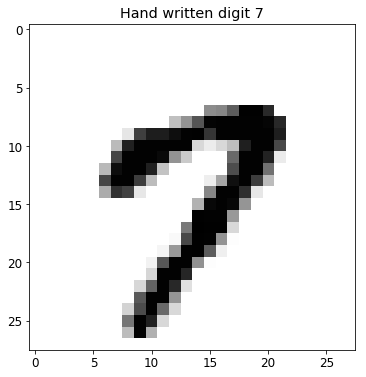

In [6]:
# Show image number 15, and write in the title what digit it should correspond to
N=15
imshow(x_train[N], cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

General guidelines:

- Time all functions you construct, and try to make them run as fast as possible by precomputing anything that can be precomputed
- Extra points are gained if you reduce the complexity of the given algorithms in any possible way, for example by exploiting linearity, etc.
- If something takes too long to execute, make sure you time it on a smaller set of input data, and give estimates of how long it would take to run the full thing (without actually running it). Plot only the results you manage to run on your PC.

### Definitions and imports to use for timing et al.:

In [7]:
from timeit import timeit

def wrapper ( func, *args, **kwargs ) :
    def wrapped () :
        return func ( *args, **kwargs )
    return wrapped

def randindex () :
    return randint( 0, x_train.shape[0] )

# Assignment 1

Implement the following distance functions

- d_infty $$ d_{\infty}(a,b) := \max_{i,j} |b_{ij}-a_{ij}|$$
- d_one $$ d_1(a,b) := \sum_{i,j} |b_{ij}-a_{ij}|$$
- d_two $$ d_2(a,b) := \sqrt{\sum_{i,j} |b_{ij}-a_{ij}|^2}$$

that take two `(28,28)` images in input, and return a non-negative number.

In [8]:
print(x_train[1].shape)
(x_train[1]-x_train[2]).shape
x_train[1].size
dd = x_train[1]-x_train[2]
dd.size
cc = reshape(dd, dd.size)
cc.shape
max(absolute(cc))
absolute( 1.0 - 0.4 )
x_train.shape[0]
# imshow(x_train[2], cmap='gray_r')
# cc = reshape(x_train[1].size,x_train[1]-x_train[2])
# ff = array([ cc for cc in ( x_train[1] - x_train[2] ) ])
# ff.shape

(28, 28)


60000

### Function $d_\infty(a, b)$:

In [9]:
def d_infty ( aa, bb ) :
    return amax( absolute( bb - aa ) )

**Comment:** Other implementation tried
```python
def d_infty ( aa, bb ) :
    return max( reshape( absolute( bb - aa ), aa.size ) )
```
takes approximately 10 times longer to run

### Function $d_1(a, b)$:

In [10]:
def d_one ( aa, bb ) :
    return sum( absolute( bb - aa ) )

### Function $d_2(a,b)$:

In [11]:
def d_two ( aa, bb ) :
    return sqrt( sum( ( bb - aa ) * ( bb - aa ) ))

**Comment:** Other implementations tried:
```python
def d_two ( aa, bb ) :
    cc = bb - aa
    return sqrt( sum( cc * cc ))

def d_two ( aa, bb ) :
    return sqrt( sum( ( bb - aa ) ** 2 ))
```
They all take approximately the same amount of time to run thus I left the one above

### Timing:

In [116]:
%timeit d_infty( x_train[ randindex() ], x_train[ randindex() ] )
%timeit d_one( x_train[ randindex() ], x_train[ randindex() ] )
%timeit d_two( x_train[ randindex() ], x_train[ randindex() ] )

10.7 µs ± 376 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10.7 µs ± 57.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
12.8 µs ± 34.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
d_infty_time = wrapper( d_infty, x_train[ randindex() ], x_train[ randindex() ] )
d_one_time = wrapper( d_one, x_train[ randindex() ], x_train[ randindex() ] )
d_two_time = wrapper( d_two, x_train[ randindex() ], x_train[ randindex() ] )

print( "Func d_infty: ", timeit( d_infty_time, number = 10000)/10000, " sec" )
print( "Func d_one: ", timeit( d_one_time, number = 10000 )/10000, " sec" )
print( "Func d_two: ", timeit( d_two_time, number = 10000 )/10000, " sec" )

**Comment:** The slowest function seems to be `d_infty`, probably because of the `reshape` function (only difference in operations used), possible to find another way of implementing it? **Yes** substituting `max` with `amax` allows to avoid function `reshape`.

# Assignment 2

Write a function that, given a number `N`, and a distance function `dist`, computes the distance matrix D of shape `(N,N)` between the first `N` entries of `x_train`:

```
D[i,j] = dist(x_train[i], x_train[j])
```

performing the **minimum** number of operations (i.e., avoid computing a distance if it has already been computed before, i.e., keep in mind that dist(a,b) = dist(b,a)).

In [219]:
def dist_mat ( N, dist ):
    D = zeros( ( N, N ) )
    for ii in range( 0, N ) :
        for jj in range( ii+1, N ) :
            D[ ii, jj ] = dist( x_train[ ii ], x_train[ jj ] )
            D[ jj, ii ] = D[ ii, jj ]
    return D

### Timing:

In [115]:
%timeit dist_mat(100, d_infty)
%timeit dist_mat(100, d_one)
%timeit dist_mat(100, d_two)

84.1 ms ± 9.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


80 ms ± 4.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


81.4 ms ± 2.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit dist_mat1(100, d_infty)
%timeit dist_mat1(100, d_one)
%timeit dist_mat1(100, d_two)

In [ ]:
dist_mat_100_infty_time = wrapper( dist_mat, 100, d_infty )
print("Func dist_mat(100, d_infty): ", timeit(dist_mat_100_infty_time, number=100)/100, " sec")

dist_mat_100_one_time = wrapper( dist_mat, 100, d_one )
print("Func dist_mat(100, d_one): ", timeit(dist_mat_100_one_time, number=100)/100, " sec")

dist_mat_100_two_time = wrapper( dist_mat, 100, d_two )
print("Func dist_mat(100, d_two): ", timeit(dist_mat_100_two_time, number=100)/100, " sec")

In [ ]:
dist_mat_100_infty_time = wrapper( dist_mat1, 100, d_infty )
print("Func dist_mat(100, d_infty): ", timeit(dist_mat_100_infty_time, number=100)/100, " sec")

dist_mat_100_one_time = wrapper( dist_mat1, 100, d_one )
print("Func dist_mat(100, d_one): ", timeit(dist_mat_100_one_time, number=100)/100, " sec")

dist_mat_100_two_time = wrapper( dist_mat1, 100, d_two )
print("Func dist_mat(100, d_two): ", timeit(dist_mat_100_two_time, number=100)/100, " sec")

In [ ]:
D = dist_mat( 10, d_infty )
D.shape

# Assignment 3

Compute and plot the three distance matrices

- Dinfty
- D1
- D2

for the first 100 images of the training set, using the function `imshow` applied to the three matrices

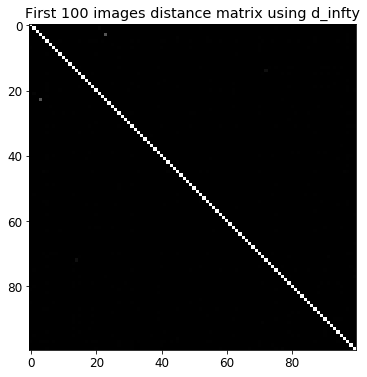

In [13]:
Dinfty = dist_mat( 100, d_infty )
# _ = figure(figsize=(8,8), constrained_layout=True)
imshow( Dinfty, cmap = 'gray_r' )
_ = title('First 100 images distance matrix using d_infty')

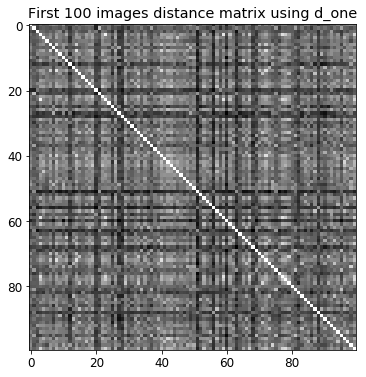

In [14]:
D1 = dist_mat( 100, d_one )
# _ = figure(figsize=(8,8), constrained_layout=True)
imshow( D1, cmap = 'gray_r' )
_ = title('First 100 images distance matrix using d_one')

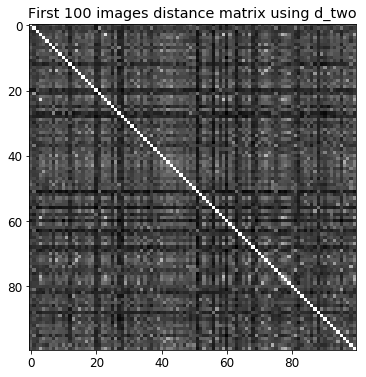

In [15]:
D2 = dist_mat( 100, d_two )
# _ = figure(figsize=(8,8), constrained_layout=True)
imshow( D2, cmap = 'gray_r' )
_ = title('First 100 images distance matrix using d_two')

# Assignment 4

Using only a distance matrix, apply the algorithm described above and compute the efficency of the algorithm, i.e., write a function that:

Given a distance matrix with shape `(N,N)`, constructed on the first `N` samples of the `x_train` set, count the number of failures of the **leave one out** strategy, i.e., 

- set `error_counter` to zero

- for every line `i` of the matrix:

    - find the index `j` (different from `i`) for which `D[i,k] >= D[i,j]` for all `k` different from `i` and `j`.

    - if `y_train[j]` is different from `y_train[i]`, increment by one `error_counter`

- return the error: error_counter/N

- apply the function above to the 3 different distance matrices you computed before

In [218]:
def loo_cv ( dmat ) :
    error_counter = 0
    for ii in range( 0, dmat.shape[0] ) :
        msk = full( dmat.shape[1], False )
        msk[ii] = True
        jj = argmin( ma.array( dmat[ii,:], mask=msk ) )
        if ( y_train[ii] != y_train[jj] ) :
            error_counter += 1
    return error_counter/dmat.shape[0]

In [161]:
%time loo_cv( Dinfty )
%time loo_cv( D1 )
%time loo_cv( D2 )

CPU times: user 46.6 ms, sys: 1 µs, total: 46.6 ms
Wall time: 41.6 ms


CPU times: user 51.1 ms, sys: 5 µs, total: 51.1 ms
Wall time: 46.5 ms


CPU times: user 52.6 ms, sys: 8 ms, total: 60.6 ms
Wall time: 57.7 ms


0.17

- some tests and notes, change cell to code (`Y`) to execute:

ba = True
bb = False
ia = 1
ib = 2
ic = 1
ia += ( ia != ic )
ia += ( ib != ic )
ia += ( ib != ic )
ia

D_test = dist_mat( 10, d_two )
imshow( D_test, cmap = 'gray_r' )
_ = xticks(linspace(0, 9, 10), labels=y_train[:10])
_ = yticks(linspace(0, 9, 10), labels=y_train[:10])

%time loo_cv( dist_mat( 1, d_two ) )
%time loo_cv( dist_mat( 100, d_two ) )
%time loo_cv( dist_mat( 200, d_two ) )
%time loo_cv( dist_mat( 400, d_two ) )
%time loo_cv( dist_mat( 800, d_two ) )

### Applying cross-validation to the 3 distance matrix:

In [17]:
Dinfty_cv = loo_cv( Dinfty )
D1_cv = loo_cv( D1 )
D2_cv = loo_cv( D2 )
print( Dinfty_cv, D1_cv, D2_cv )

0.58 0.17 0.17


# Assignment 5

Run the algorithm implemented above for N=100,200,400,800,1600 on the three different distances, and plot the three error rate as a function of N (i.e., compute the distance matrix, and compute the efficiency associated to the distance matrix).

You should get an error like:
```
[[ 0.58      0.17      0.17    ]
 [ 0.52      0.145     0.135   ]
 [ 0.4425    0.15      0.135   ]
 [ 0.4       0.145     0.12875 ]
 [ 0.369375  0.1025    0.09375 ]]
```
where each column represents a different norm.

In [162]:
Nsize = array([100 * 2**ii for ii in range(0,5)])
efficiency = zeros((len(Nsize),3))
for ii in range(0,len(Nsize)) :
    efficiency[ii] = [loo_cv( dist_mat( Nsize[ii], d_infty ) ), 
                      loo_cv( dist_mat( Nsize[ii], d_one ) ), 
                      loo_cv( dist_mat( Nsize[ii], d_two ) )]
print(efficiency)
save("efficiency.npy", efficiency)

[[0.58     0.17     0.17    ]
 [0.52     0.145    0.135   ]
 [0.4425   0.15     0.135   ]
 [0.4      0.145    0.12875 ]
 [0.369375 0.1025   0.09375 ]]


In [164]:
efficiency = load("efficiency.npy")

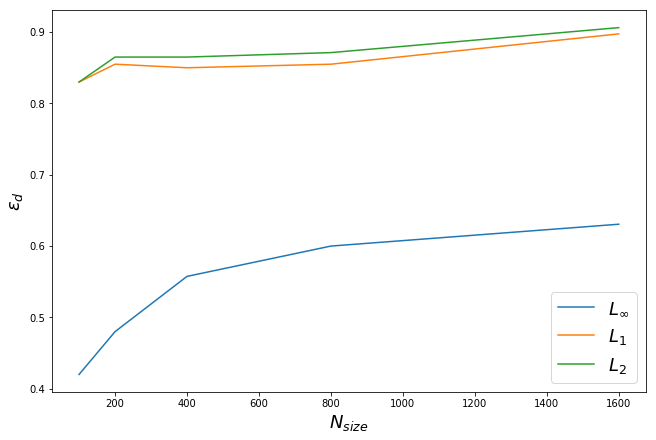

In [220]:
_ = figure( figsize=(9,6), constrained_layout=True )
plot(Nsize, 1-efficiency[:,0], label="$L_\infty$")
plot(Nsize, 1-efficiency[:,1], label="$L_1$")
plot(Nsize, 1-efficiency[:,2], label="$L_2$")
legend(loc='best', fontsize=18)
_ = xlabel("$N_{size}$", fontsize=18)
_ = ylabel("$\epsilon_d$", fontsize=18)

**In the next assignments, optional points are given if you manage to make the algorithm run faster, by pre-computing everything you can precompute in advance**

# Assignment 6

In principle, it should be possible to decrease the error by using a better norm. From the table above, it is clear that the L2 distance works better than the L1 distance, which works better than the Linfty distance.

However, *none of these distances exploit the fact that the image is a two-dimensional object*, and that there is information also in the **neighboring** information of the pixels. 

One way to exploit this, is to interpret the image as a continuous function with values between zero and one, defined on a square domain `\Omega=[0,27]x[0,27]`.

$$ f: \Omega \to R $$

- Implement a function that computes an approximation of the $H^1$ norm distance on the renormalized images. Given two images $f_1$ and $f_2$
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Define the $H^1$ distance as
    $$
    d_{H^1}(f_1,f_2) := \sqrt{\int_\Omega |\nabla(a-b)|^2+ (a-b)^2}
    $$
    using the algorithm you prefer (or the library you prefer) to compute the gradients and the integrals. Notice that $\nabla f = (\partial f/\partial x, \partial f/\partial y)$ is a vector valued function, and $|\nabla g|^2 := (\partial g/\partial x)^2 + (\partial g/\partial y)^2$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600

In [18]:
def normalize ( image ) :
    integral = numpy.sum( image )
    return image/integral

Testing function `normalize`:

In [19]:
%timeit normalize( x_train[randindex()] )

8.25 µs ± 197 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [73]:
def d_H1 ( aa, bb ) :
    cc = ( normalize( aa ) - normalize( bb ) ).reshape( img_rows, img_cols )
    absgrad = absolute( gradient( cc ) )
#     absgrad = absolute( gradient( cc.reshape( img_rows, img_cols ) ) )
    return sqrt( sum( absgrad[0] * absgrad[0] + absgrad[1] * absgrad[1] + cc * cc ) )

**Note** that we added in a second time the `reshape( img_rows, img_cols )` to guarantee this distance will still work with the ball-tree algorithm that uses a 2D array thus requires the image to be reshaped to `(img_rows * img_cols)`.
We checked that by adding this, the function `d_H1` takes approximately $1 \pm 0.5 \mu s$ more than the version without it, thus the overhead is negligible.

### Timing:

In [21]:
%timeit d_H1( x_train[1], x_train[2] )

66.5 µs ± 578 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [24]:
%timeit d_H1( x_train[1], x_train[2] )

65.3 µs ± 666 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Efficiency:

In [156]:
eff_DH1 = array([])
for ii in range(0, len(Nsize)) :
    eff_DH1 = append(eff_DH1, loo_cv( dist_mat(Nsize[ii], d_H1) ) )
save("eff_DH1.npy", eff_DH1)

In [168]:
eff_DH1 = load("eff_DH1.npy")

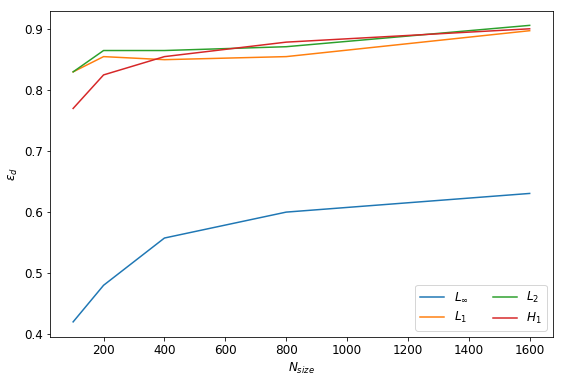

In [224]:
# _ = figure( figsize=(9,6), constrained_layout=True )
plot(Nsize, 1-efficiency[:,0], label="$L_\infty$")
plot(Nsize, 1-efficiency[:,1], label="$L_1$")
plot(Nsize, 1-efficiency[:,2], label="$L_2$")
plot(Nsize, 1-eff_DH1, label="$H_1$")
legend(loc='best', ncol=2)
_ = xlabel("$N_{size}$")
_ = ylabel("$\epsilon_d$")

## Assignment 7

An even better improvement on the previous distance function is given by the following algorithm

- Given two images $f1$ and $f2$:
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Solve 
    $$
    -\Delta \phi = a - b \qquad \text{ in } \Omega
    $$
    $$
    \phi = 0 \text{ on } \partial\Omega
    $$
    - Define the *Monge Ampere* distance
    $$
    d_{MA}(f_1,f_2) = \int_\Omega (a+b)|\nabla \phi|^2
    $$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600

### Solution:
Using the finite difference method we can rewrite the Poisson equation above as:
$$
-\nabla^2\phi \approx \frac{1}{h^2} \bigl[ -\phi_{i-1,j} + 2 \phi_{i,j} - \phi_{i+1,j} - \phi_{i,j-1} + 2 \phi_{i,j} - \phi_{i,j+1}\bigr] = (a - b)_{i,j}
$$
which is a linear system $A \phi = f$ where $f = (a - b)_{i,j}$ has to be re-written as a 1 dimensional array with $N^2$ elements.

### Build matrix A:
It will have dimension $N^2 \times N^2$ so if our images are 28 pixel$^2$ then

In [26]:
dimA = img_rows * img_cols
hh = 1./dimA

Now, we know that the diagonal will have all 4 (since we have $2\phi_{i,j} + 2\phi_{i,j}$), lets define then the corresponding array that will have dimension $N^2$:

In [27]:
diag_el = 4*ones((dimA,)) 

Now we need to build the off-diagonal terms. First those containing the $(i,j\pm1)$ terms of the linear system that will be have all elements $=-1$. Since these *off-diagonals* will be shifted by N positions, their lenght must be $N^2 - N$

In [28]:
offdiag_el_j = -1*ones((dimA-img_rows,))

Finally we have to construct the *off-diagonals* containing the $(i\pm1,j)$ terms which will have all the elements $=-1$ except for the $(N-1)^\text{th}$ that are set to 0 because of the boundary conditions. These *off-diagonal* arrays will be shifted of $1$ position thus their lenght has to be $N^2-1$: 

In [29]:
offdiag_el_i = -1 * ones(dimA-1)
offdiag_el_i[where([(ii%img_rows) == 0 for ii in range(1,dimA)])] = 0

We can now build matrix **A**

In [30]:
A = ( diag( offdiag_el_j, -img_rows ) + diag( offdiag_el_i, -1 ) + diag( diag_el, 0 ) )
A += ( diag( offdiag_el_i, +1 ) + diag( offdiag_el_j, +img_rows ) )
A /= hh*hh

# Change first row of the matrix A
A[0,:] = 0
A[:,0] = 0
A[0,0] = 1

# Change last row of the matrix A
A[-1,:] = 0
A[:,-1] = 0
A[-1,-1] = 1

### Build function f(a,b) :

In [120]:
def f ( f1, f2 ) :
    tmp_f = normalize( f1 ) - normalize( f2 )
    tmp_f[0] = 0
    tmp_f[-1] = 0
    return tmp_f
#     return normalize( f1 ) - normalize( f2 )

In [121]:
%timeit f( x_train[ randindex()], x_train[ randindex()] )

18.3 µs ± 113 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Build solver:

First we pre-compute the LU decomposition of matrix A:

In [32]:
def LU(A):
    A = A.copy()
    N=len(A)
    for k in range(N-1):
        if (abs(A[k,k]) < 1e-15):
            raise RuntimeError("Null pivot")
            
        A[k+1:N,k] /= A[k,k]
        for j in range(k+1,N):
            A[k+1:N,j] -= A[k+1:N,k]*A[k,j]
    
    L=tril(A)
    for i in range(N):
        L[i,i]=1.0
    U = triu(A)
    return L, U

L, U = LU(A)

Here we pre-compute the inverse of the matrices' L & U diagonals:

In [143]:
_x = zeros((img_rows * img_cols,))
N = len(L)
_L = ones(N)
_U = ones(N)

for i in range(0,N):
    _L[i] /= L[i,i]
    _U[i] /= U[i,i]

Solve lower triangle:

In [144]:
def L_solve(L,rhs):
    x = _x    
    x[0] = rhs[0]*_L[0]
    for i in range(1,N):
        x[i] = (rhs[i] - dot(L[i, 0:i], x[0:i]))*_L[i]
    
    return x

Old implementation:
```python
def L_solve(L,rhs):
    x = zeros_like(rhs)
    N = len(L)
        
    x[0] = rhs[0]/L[0,0]
    for i in range(1,N):
        x[i] = (rhs[i] - dot(L[i, 0:i], x[0:i]))/L[i,i]
    
    return x
```

- **Timing** `L_solve`

In [145]:
rhs = f( x_train[ randindex()], x_train[ randindex()] ).reshape((img_rows*img_cols))
%timeit L_solve(L, rhs)

2.76 ms ± 43.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Solve the upper triangle:

In [148]:
def U_solve (U,rhs):
    x = _x        
    x[-1] = rhs[-1]*_U[-1]
    for i in reversed(range(N-1)):
        x[i] = (rhs[i] -dot(U[i, i+1:N], x[i+1:N]))*_U[i]
        
    return x

Old implementation:
```python
def U_solve (U,rhs):
    x = zeros_like(rhs)
    N=len(U)
            
    x[-1] = rhs[-1]/U[-1,-1]
    for i in reversed(range(N-1)):
        x[i] = (rhs[i] -dot(U[i, i+1:N], x[i+1:N]))/U[i,i]
        
    return x
```

- **Timing** `U_solve`

In [149]:
rhs = f( x_train[ randindex()], x_train[ randindex()] ).reshape((img_rows*img_cols))
w = L_solve(L, rhs)
%timeit U_solve(U, w)

1.14 ms ± 7.98 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Solve for $\phi$ by first solving the lower triangle and then the upper triangle, note that we reshape the result after each solve to get a function which will also work with the `BallTree` algorithm (reshaping adds little to no overhead: order of the $\mu s$)

In [150]:
def phi ( f1, f2 ) :
    w = L_solve(L, f(f1, f2).reshape((img_rows*img_cols)))
    return U_solve(U, w).reshape((img_rows,img_cols))

In [151]:
%timeit phi( x_train[randindex()], x_train[randindex()])

4.13 ms ± 50 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Define Monge-Ampere distance:

$$
d_{MA}(f_1,f_2) = \int_\Omega (a+b)|\nabla \phi|^2
$$

In [154]:
def d_MA ( aa, bb ) :
    cc = ( normalize( aa ) + normalize( bb ) ).reshape( img_rows, img_cols )
    grphi = array( gradient( phi( aa, bb ) ) )
    return sum( cc * grphi * grphi )

- Timing `d_MA`

In [155]:
%timeit d_MA( x_train[randindex()], x_train[randindex()] )

4.24 ms ± 83.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


- distance matrix Monge-Ampere (first 100 entries)

In [ ]:
%timeit DMA = dist_mat(100, d_MA)
imshow( DMA, cmap = 'gray_r' )
_ = xticks(linspace(0, 9, 10), labels=y_train[:10])
_ = yticks(linspace(0, 9, 10), labels=y_train[:10])

- efficiency (all together!)

**Note** that computing the distance matrix (function `dist_mat`) takes approximately $t_{dist} \cdot N^2 /2$ (where $N$ is the size of the matrix).
Since the Monge-Ampere distance takes around $4 ms$ to run for 2 single images, computing the distance matrix, needed to estimate the efficiency, with $N = 1600$ will approximately take $2\div3$ hours, therefore we recomend to load the precomputed numpy array.

In [ ]:
eff_dMA = array([])
for ii in range(0, len(Nsize)) :
    eff_dMA = append(eff_dMA, loo_cv( dist_mat(Nsize[ii], d_MA) ) )
save("eff_dMA.npy", eff_dMA)

In [214]:
eff_dMA = load("eff_dMA.npy")

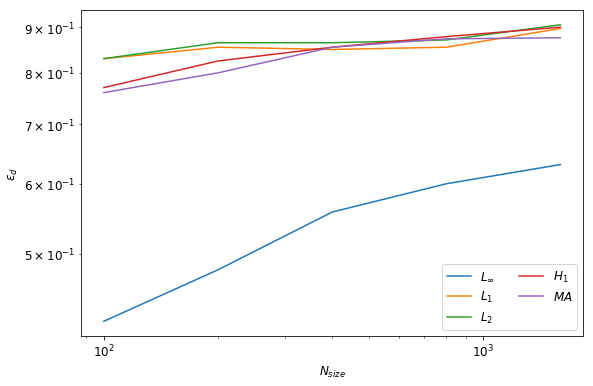

In [225]:
# _ = figure( figsize=(9,6), constrained_layout=True )
xscale('log')
yscale('log')
plot(Nsize, 1-efficiency[:,0], label="$L_\infty$")
plot(Nsize, 1-efficiency[:,1], label="$L_1$")
plot(Nsize, 1-efficiency[:,2], label="$L_2$")
plot(Nsize, 1-eff_DH1, label="$H_1$")
plot(Nsize, 1-eff_dMA, label="$MA$")
legend(loc='best', ncol=2)
_ = xlabel("$N_{size}$")
_ = ylabel("$\epsilon_d$")

## A progress bar ...
... because I'm anxious and want to know how long to the end of the process.

(Credits: [this guy](https://github.com/kuk/log-progress))

In [67]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

## Assigment 8 (optional for DSSC, PhD and LM, Mandatory for MHPC)

Use the `BallTree` algorithm (https://en.wikipedia.org/wiki/Ball_tree), from the `sklearn` package, and construct a tree data structure **that uses one of the custom distances defined above**.

For each N in 3200,6400,12800,25600,51200, and for each distance defined above

- Build a tree using the first N entries of the training set `x_train`
- Construct a function that tests the efficiency on all the entries of the test set `x_test`:
    - for any image in `x_test`, call it `x_test[i]`, query the tree for the nearest neighbor (call it `k`), and assign as predicted digit the digit of the `x_train[k]` image, i.e., `y_train[k]`
    - check if `y_train[k]` is equal to the corresponding entry in `y_test[i]`. If not, increment a counter of the error
    - return the efficiency, i.e., `error_counter/len(x_test)`
- Plot, in a single graph, the error of each distance as a function of `N` (including labels, titles, etc.)

- Once you have the tree, experiment with different nearest neighbor algorithms, i.e., instead of taking only one nearest neighbor, take a larger number (a small number of your choice), and instead of returning the single closest digit, return the one with the largest number of occurrences. Plot the same graph you gave before, and see if you gain an improvement. Motivate all choices you have to make to get to the final answer.


**IF YOU DON'T HAVE ENOUGH COMPUTATIONAL POWER, RUN THE EXERCISES ONLY UP TO WHAT IS SUSTAINABLE FOR YOUR PC**

### Some preliminaries:

We are now using the `BallTree` data structure teaching it how to distinguish between hand-written digits.
To this end we will divide the train set in two parts, one of which we will use to train the data-structure.
First of all we define the vector containing the sizes of the different test sets:

In [68]:
Ndiv = array([3200, 6400, 12800, 25600, 51200], dtype=int)

Here we import the data structure:

In [69]:
from sklearn.neighbors import BallTree as btree
# btree??

Here just redefining the contructor of the ball-tree to keep the notation lighter:

In [70]:
def build_bt ( N, mymetric ) :
    return btree( x_train[:N].reshape( N, img_rows*img_cols ), metric = mymetric )

Import matplotlib for fancier plots

In [201]:
%matplotlib inline
import matplotlib.pyplot as plt

### Building the trees:

Here we are building a set of arrays containing the several ball-trees for the set of distances and trainings (import pickle to store them and avoid re-computing at every access):

In [93]:
import pickle as pkl

To speed-up re-usage, we already computed the ball-trees once and dumped into files with pickle. To run the algorithm and build the tree from scratch, switch the markdown-code cells below each distance.

- $d_\infty$

In [ ]:
bt_infty = array([ build_bt( N, d_infty ) for N in log_progress( Ndiv, every=1, name='d_infty metric' ) ])

In [ ]:
for nd in range(0,len(Ndiv)) :
    pkl.dump(bt_infty[nd], open("BallTrees_infty"+str(Ndiv[nd])+".npy", "wb"))

In [ ]:
# bt_infty = array([]) 
# for nd in range(0,len(Ndiv)) :
#     bt_infty = append( bt_infty, load("BallTrees_infty"+str(Ndiv[nd])+".npy") )

- $d_1$

In [ ]:
bt_one = array([ build_bt( N, d_one ) for N in log_progress( Ndiv, every=1, name='d_one metric' ) ])

In [ ]:
for nd in range(0,len(Ndiv)) :
    pkl.dump(bt_one[nd], open("BallTrees_one"+str(Ndiv[nd])+".npy", "wb"))

In [ ]:
# bt_one = array([]) 
# for nd in range(0,len(Ndiv)) :
#     bt_one = append( bt_one, load("BallTrees_one"+str(Ndiv[nd])+".npy") )

- $d_2$

In [ ]:
bt_two = array([ build_bt( N, d_two ) for N in log_progress( Ndiv, every=1, name='d_two metric' ) ])

In [ ]:
for nd in range(0,len(Ndiv)) :
    pkl.dump(bt_two[nd], open("BallTrees_two"+str(Ndiv[nd])+".npy", "wb"))

In [ ]:
# bt_two = array([]) 
# for nd in range(0,len(Ndiv)) :
#     bt_two = append( bt_two, load("BallTrees_two"+str(Ndiv[nd])+".npy") )

- $d_{H1}$

In [ ]:
bt_H1 = array([ build_bt( N, d_H1 ) for N in log_progress( Ndiv, every=1, name='d_H1 metric' ) ])

In [ ]:
for nd in range(0,len(Ndiv)) :
    pkl.dump(bt_H1[nd], open("BallTrees_H1"+str(Ndiv[nd])+".npy", "wb"))

In [ ]:
# bt_H1 = array([]) 
# for nd in range(0,len(Ndiv)) :
#     bt_H1 = append( bt_H1, load("BallTrees_H1"+str(Ndiv[nd])+".npy") )

- $d_{MA}$

In [ ]:
bt_MA = array([ build_bt( N, d_MA ) for N in log_progress( Ndiv, every=1, name='d_MA metric' ) ])

In [ ]:
for nd in range(0,len(Ndiv)) :
    pkl.dump(bt_MA[nd], open("BallTrees_MA"+str(Ndiv[nd])+".npy", "wb"))

In [ ]:
# bt_MA = array([]) 
# for nd in range(0,len(Ndiv)) :
#     bt_MA = append( bt_MA, load("BallTrees_MA"+str(Ndiv[nd])+".npy") )

### Classification functions:

We define three functions to classify the image in the test-set from the ball-tree:

In [266]:
def classify_closer ( bt, xx ) :
    [[k]] = bt.query(xx.reshape((1, img_rows*img_cols)), k = 1, return_distance = False)
    return y_train[k]

- timing

In [271]:
ind = randint( 0, x_test.shape[0] )
%time value = classify_closer(bt_H1[4], x_test[ind])
print(y_test[ind], "classified as ", value)

CPU times: user 4.32 s, sys: 3 µs, total: 4.32 s
Wall time: 4.36 s
8 classified as  8


In [262]:
def classify_mostcomm ( bt, xx, N_neigh=10 ) :
    [k] = bt.query(xx.reshape((1, img_rows*img_cols)), k = N_neigh, return_distance = False)
    k.shape
    return argmax(bincount(y_train[k], minlength=10))

- timing

In [272]:
ind = randint( 0, x_test.shape[0] )
%time value = classify_mostcomm(bt_H1[4], x_test[ind])
print(y_test[ind], "classified as ", value)

CPU times: user 4.13 s, sys: 12 ms, total: 4.14 s
Wall time: 4.18 s
4 classified as  4


In [257]:
def classify_weight ( bt, xx, N_neigh=10 ) :
    [D], [k] = bt.query(xx.reshape((1, img_rows*img_cols)), k = N_neigh)
    return argmax(bincount(y_train[k], minlength=10, weights=1./D))

- timing

In [268]:
ind = randint( 0, x_test.shape[0] )
%time value = classify_weight(bt_H1[4], x_test[ind])
print(y_test[ind], "classified as ", value)

CPU times: user 4.29 s, sys: 1 µs, total: 4.29 s
Wall time: 4.28 s
1 classified as  1


All the 3 functions take approximately the same amount of time to compute, this is because the most computationally expensive operation is quering the tree.

We compared the execution time in the case of the larger trees built ($N = 51200$).
While the time needed for a classification in the case of the first 3 simple distances (`d_infty`, `d_one`, `d_two`) is of the order of $10^2\ ms$, for the `d_H1` distance it is around $4\ s$ and for the `d_MA` distance it reaches up to $2 min$.

These very long time makes unaffordable to run the efficiency testing on the whole test set (which is composed of $10^4$ entries).

### Functions for testing efficiency:

We define three functions to measure the efficiency of the data-structure.

- `bt_eff` simply searches for the **closest image** in the ball-tree and returns the mean error-count:

In [103]:
def bt_eff ( bt, X, Y ) :
    error_counter = 0
    for ii in log_progress(range(0, len(X)), every=10, name='Queries closer') :
        [[k]] = bt.query(X[ii].reshape((1, img_rows*img_cols)), k = 1, return_distance = False)
        if ( y_train[k] != Y[ii] ) :
            error_counter += 1.
    return error_counter/len(X)    

- `bt_eff_most_common` searches for the closer `N_neigh` images in the data structure and checks for the **most common** between them. Also in this case the mean error-count is returned:

In [104]:
def bt_eff_most_common ( bt, X, Y, N_neigh=10 ) :
    error_counter = 0
    for ii in log_progress(range(0, len(X)), every=10, name='Queries most-common') :
        [k] = bt.query(X[ii].reshape((1, img_rows*img_cols)), k = N_neigh, return_distance = False)
#         print(Y[ii], y_train[k], ": ", argmax(bincount(y_train[k], minlength=10)))
        if ( argmax(bincount(y_train[k], minlength=10)) != Y[ii] ) :
            error_counter += 1.
    return error_counter/len(X)    

- also `bt_eff_weight` searches for the closer `N_neigh` images but it weights the entries on the inverse of the distance from the testing image, returning (*hopefuly*) a better estimate of the target label.

In [105]:
def bt_eff_weight ( bt, X, Y, N_neigh=10 ) :
    error_counter = 0
    for ii in log_progress(range(0, len(X)), every=10, name='Queries weight') :
        [D], [k] = bt.query(X[ii].reshape((1, img_rows*img_cols)), k = N_neigh)
#         print(Y[ii], y_train[k], ": ", argmax(bincount(y_train[k], minlength=10, weights=1./D)))
        if ( argmax(bincount(y_train[k], minlength=10, weights=1./D)) != Y[ii] ) :
            error_counter += 1.
    return error_counter/len(X)  

We will run the efficiency measurements in a very reduced test subset to keep the computation into reasonable times. 

## Efficiency measures: closer

### Ball-Tree with $d_\infty$

In [273]:
bt_infty_eff = array([bt_eff(bt, x_test[:100], y_test[:100]) for bt in bt_infty])
save("bt_infty_eff_100.npy", bt_infty_eff)

### Ball-Tree with $d_1$

In [274]:
bt_one_eff = array([bt_eff(bt, x_test[:100], y_test[:100]) for bt in bt_one])
save("bt_one_eff_100.npy", bt_one_eff)

### Ball-Tree with $d_2$

In [275]:
bt_two_eff = array([bt_eff(bt, x_test[:100], y_test[:100]) for bt in bt_two])
save("bt_two_eff_100.npy", bt_two_eff)

### Ball-Tree with $d_{H1}$

In [278]:
bt_H1_eff = array([bt_eff(bt, x_test[:100], y_test[:100]) for bt in bt_H1])
save("bt_H1_eff_100.npy", bt_H1_eff)

### Ball-Tree with $d_{MA}$

In [ ]:
bt_MA_eff = array([bt_eff(bt, x_test[:100], y_test[:100]) for bt in bt_MA])
save("bt_MA_eff_100.npy", bt_MA_eff)

### Plots:

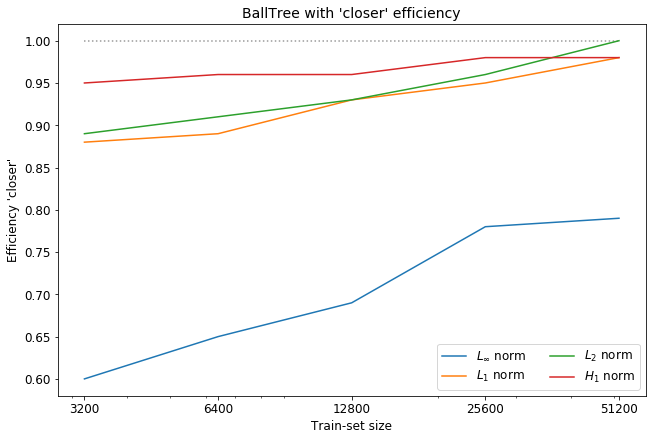

In [279]:
bt_infty_eff = load("bt_infty_eff_100.npy")
bt_one_eff = load("bt_one_eff_100.npy")
bt_two_eff = load("bt_two_eff_100.npy")
bt_H1_eff = load("bt_H1_eff_100.npy")
# bt_MA_eff = load("bt_MA_eff_100.npy")
fig = figure(figsize = (9,6), constrained_layout=True)
ax = fig.add_subplot(111)
ax.set_title("BallTree with 'closer' efficiency", fontsize=14)
ax.set_xscale('log')
ax.set_xticks(Ndiv)
ax.set_xticklabels([str(nd) for nd in Ndiv])
ax.set_xlabel("Train-set size")
ax.set_ylabel("Efficiency 'closer'")
ax.plot([3200,51200],[1.,1.], ':k', alpha=0.4)
ax.plot(Ndiv, 1 - bt_infty_eff, label = "$L_\\infty$ norm")
ax.plot(Ndiv, 1 - bt_one_eff, label = "$L_1$ norm")
ax.plot(Ndiv, 1 - bt_two_eff, label = "$L_2$ norm")
ax.plot(Ndiv, 1 - bt_H1_eff, label = "$H_1$ norm")
# ax.plot(Ndiv, 1 - bt_MA_eff, label = "Monge-Ampere")
ax.legend(loc='best', ncol=2)

## Efficiency measures: most-common

We run the test only for the faster distance measures for lack of time.

### Ball-Tree with $d_\infty$

In [281]:
bt_infty_eff_mostcomm = array([bt_eff_most_common(bt, x_test[:100], y_test[:100]) for bt in bt_infty])
save("bt_infty_eff_most_common_100.npy", bt_infty_eff_mostcomm)

### Ball-Tree with $d_1$

In [280]:
bt_one_eff_mostcomm = array([bt_eff_most_common(bt, x_test[:100], y_test[:100]) for bt in bt_one])
save("bt_one_eff_most_common_100.npy", bt_one_eff_mostcomm)

### Ball-Tree with $d_2$

In [286]:
bt_two_eff_mostcomm = array([bt_eff_most_common(bt, x_test[:100], y_test[:100]) for bt in bt_two])
save("bt_two_eff_100_most_common.npy", bt_two_eff_mostcomm)

### Ball-Tree with $d_{H1}$

In [284]:
# bt_H1_eff_mostcomm = array([bt_eff_most_common(bt, x_test[:100], y_test[:100]) for bt in bt_H1])
# save("bt_H1_eff_100_most_common.npy", bt_H1_eff_mostcomm)

### Ball-Tree with $d_{MA}$

In [285]:
# bt_MA_eff_mostcomm = array([bt_eff_most_common(bt, x_test[:100], y_test[:100]) for bt in bt_MA])
# save("bt_MA_eff_100_most_common.npy", bt_MA_eff_mostcomm)

### Plots:

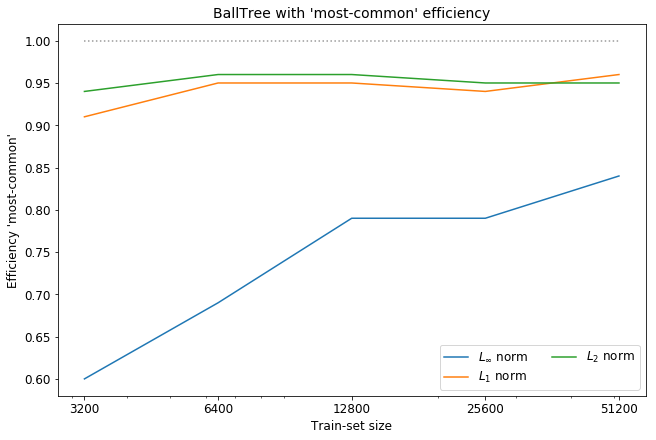

In [288]:
bt_infty_eff = load("bt_infty_eff_most_common_100.npy")
bt_one_eff = load("bt_one_eff_most_common_100.npy")
bt_two_eff = load("bt_two_eff_100_most_common.npy")
# bt_H1_eff = load("bt_H1_eff_most_common_100.npy")
# bt_MA_eff = load("bt_MA_eff_most_common_100.npy")
fig = figure(figsize = (9,6), constrained_layout=True)
ax = fig.add_subplot(111)
ax.set_title("BallTree with 'most-common' efficiency", fontsize=14)
ax.set_xscale('log')
ax.set_xticks(Ndiv)
ax.set_xticklabels([str(nd) for nd in Ndiv])
ax.set_xlabel("Train-set size")
ax.set_ylabel("Efficiency 'most-common'")
ax.plot([3200,51200],[1.,1.], ':k', alpha=0.4)
ax.plot(Ndiv, 1 - bt_infty_eff, label = "$L_\\infty$ norm")
ax.plot(Ndiv, 1 - bt_one_eff, label = "$L_1$ norm")
ax.plot(Ndiv, 1 - bt_two_eff, label = "$L_2$ norm")
# ax.plot(Ndiv, 1 - bt_H1_eff, label = "$H_1$ norm")
# ax.plot(Ndiv, 1 - bt_MA_eff, label = "Monge-Ampere")
ax.legend(loc='best', ncol=2)

## Efficiency measures: weight

We run the test only for the faster distance measures for lack of time. Nonetheless it seems to perform better than the *most-common* case.

### Ball-Tree with $d_\infty$

In [289]:
bt_infty_eff_weight = array([bt_eff_weight(bt, x_test[:100], y_test[:100]) for bt in bt_infty])
save("bt_infty_eff_weight_100.npy", bt_infty_eff_weight)

### Ball-Tree with $d_1$

In [290]:
bt_one_eff_weight = array([bt_eff_weight(bt, x_test[:100], y_test[:100]) for bt in bt_one])
save("bt_one_eff_weight_100.npy", bt_one_eff_weight)

### Ball-Tree with $d_2$

In [291]:
bt_two_eff_weight = array([bt_eff_weight(bt, x_test[:100], y_test[:100]) for bt in bt_two])
save("bt_two_eff_weight_100.npy", bt_two_eff_weight)

### Ball-Tree with $d_{H1}$

In [284]:
# bt_H1_eff_weight = array([bt_eff_weight(bt, x_test[:100], y_test[:100]) for bt in bt_H1])
# save("bt_H1_eff_100_weight.npy", bt_H1_eff_weight)

### Ball-Tree with $d_{MA}$

In [285]:
# bt_MA_eff_weight = array([bt_eff_weight(bt, x_test[:100], y_test[:100]) for bt in bt_MA])
# save("bt_MA_eff_100_weight.npy", bt_MA_eff_weight)

### Plots:

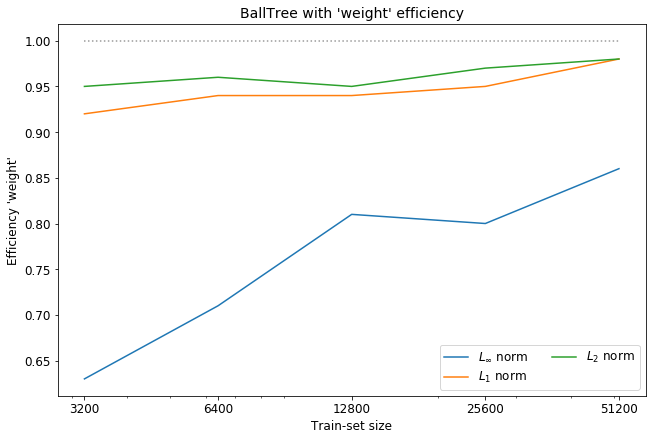

In [292]:
bt_infty_eff = load("bt_infty_eff_weight_100.npy")
bt_one_eff = load("bt_one_eff_weight_100.npy")
bt_two_eff = load("bt_two_eff_weight_100.npy")
# bt_H1_eff = load("bt_H1_eff_weight_100.npy")
# bt_MA_eff = load("bt_MA_eff_weight_100.npy")
fig = figure(figsize = (9,6), constrained_layout=True)
ax = fig.add_subplot(111)
ax.set_title("BallTree with 'weight' efficiency", fontsize=14)
ax.set_xscale('log')
ax.set_xticks(Ndiv)
ax.set_xticklabels([str(nd) for nd in Ndiv])
ax.set_xlabel("Train-set size")
ax.set_ylabel("Efficiency 'weight'")
ax.plot([3200,51200],[1.,1.], ':k', alpha=0.4)
ax.plot(Ndiv, 1 - bt_infty_eff, label = "$L_\\infty$ norm")
ax.plot(Ndiv, 1 - bt_one_eff, label = "$L_1$ norm")
ax.plot(Ndiv, 1 - bt_two_eff, label = "$L_2$ norm")
# ax.plot(Ndiv, 1 - bt_H1_eff, label = "$H_1$ norm")
# ax.plot(Ndiv, 1 - bt_MA_eff, label = "Monge-Ampere")
ax.legend(loc='best', ncol=2)

### Some tests:

From some tests run on random inputs for the different efficiency measures provided, we find that for small trees the `closer` efficiency is the most reliable.
This is probably due to the presence in the test set of digits really *poorly written*, thus it might happen that in the train set some similar images are found, but in a set of neighbors it is most frequent to get the wrong result. This happens also with the **weighted** efficiency. We suspect that with larger ball-trees the problem should be overcome.

In [107]:
ball = btree(x_train[:Ndiv[0]].reshape((3200,img_rows*img_cols)), metric=d_two)

In [134]:
bt_eff( ball, x_test, y_test )

0.0783

In [137]:
bt_eff_most_common( ball, x_test, y_test, N_neigh=100 )

0.1789

In [175]:
bt_eff_most_common( ball, x_test[:10], y_test[:10], N_neigh=5 )

7 [7 7 7 7 7] :  7
2 [2 2 2 2 2] :  2
1 [1 1 1 1 1] :  1
0 [0 0 0 0 0] :  0
4 [9 4 4 9 4] :  4
1 [1 1 1 1 1] :  1
4 [9 4 4 4 4] :  4
9 [9 9 9 4 4] :  9
5 [5 6 4 4 6] :  4
9 [9 9 7 9 7] :  9


0.1

In [211]:
bt_eff_weight( ball, x_test, y_test, N_neigh=100 )

0.17

In [209]:
bt_eff_weight( ball, x_test[:10], y_test[:10], N_neigh=5 )

7 [7 7 7 7 7] :  7
2 [2 2 2 2 2] :  2
1 [1 1 1 1 1] :  1
0 [0 0 0 0 0] :  0
4 [9 4 4 9 4] :  4
1 [1 1 1 1 1] :  1
4 [9 4 4 4 4] :  4
9 [9 9 9 4 4] :  9
5 [5 6 4 4 6] :  4
9 [9 9 7 9 7] :  9


0.1

In [176]:
ind=5003
[D], [k] = ball.query(x_train[ind].reshape((1, 28*28)), k = 100)

In [142]:
D

array([3.63012727, 4.78960652, 4.92456125, 5.00437641, 5.02012867,
       5.08041903, 5.11087676, 5.1643277 , 5.22019562, 5.41814628,
       5.46024184, 5.60962266, 5.69033662, 5.69618881, 5.69743194,
       5.7139166 , 5.75713523, 5.79031792, 5.81313393, 5.88235556,
       5.88464402, 5.89463947, 5.98124328, 6.05838949, 6.10610275,
       6.11227769, 6.14394299, 6.18326176, 6.21266583, 6.21849879,
       6.22680024, 6.23044949, 6.24769517, 6.27101498, 6.32974951,
       6.33057187, 6.37973411, 6.39684541, 6.42836614, 6.43732867,
       6.44878683, 6.45249643, 6.46172777, 6.46448079, 6.5327166 ,
       6.57263444, 6.61438788, 6.6461264 , 6.65183009, 6.67144697,
       6.67464116, 6.67646455, 6.68229313, 6.69861435, 6.6991378 ,
       6.70928594, 6.72967458, 6.73155735, 6.75933293, 6.76859792,
       6.77479443, 6.78943478, 6.8017706 , 6.80716091, 6.83075685,
       6.86749193, 6.8928003 , 6.91053059, 6.92143646, 6.9293585 ,
       6.93518187, 6.96140734, 6.9634538 , 6.97289641, 6.97628

In [141]:
y_train[k]

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6], dtype=uint8)

In [180]:
int(average(y_train[k]+1, weights=1./D))

6

In [188]:
y_train[k]

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6], dtype=uint8)

In [182]:
_y = y_train[k]*D
_y.shape

(100,)

In [185]:
D.shape

(100,)

In [199]:
D

array([3.63012727, 4.78960652, 4.92456125, 5.00437641, 5.02012867,
       5.08041903, 5.11087676, 5.1643277 , 5.22019562, 5.41814628,
       5.46024184, 5.60962266, 5.69033662, 5.69618881, 5.69743194,
       5.7139166 , 5.75713523, 5.79031792, 5.81313393, 5.88235556,
       5.88464402, 5.89463947, 5.98124328, 6.05838949, 6.10610275,
       6.11227769, 6.14394299, 6.18326176, 6.21266583, 6.21849879,
       6.22680024, 6.23044949, 6.24769517, 6.27101498, 6.32974951,
       6.33057187, 6.37973411, 6.39684541, 6.42836614, 6.43732867,
       6.44878683, 6.45249643, 6.46172777, 6.46448079, 6.5327166 ,
       6.57263444, 6.61438788, 6.6461264 , 6.65183009, 6.67144697,
       6.67464116, 6.67646455, 6.68229313, 6.69861435, 6.6991378 ,
       6.70928594, 6.72967458, 6.73155735, 6.75933293, 6.76859792,
       6.77479443, 6.78943478, 6.8017706 , 6.80716091, 6.83075685,
       6.86749193, 6.8928003 , 6.91053059, 6.92143646, 6.9293585 ,
       6.93518187, 6.96140734, 6.9634538 , 6.97289641, 6.97628

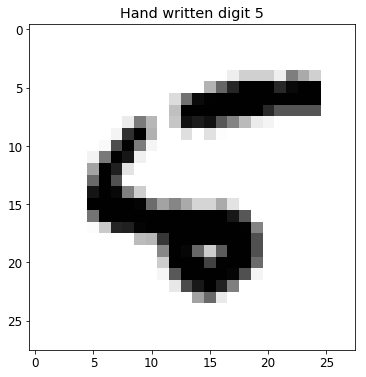

In [220]:
imshow(x_test[8], cmap='gray_r')
_ = title('Hand written digit '+str(y_test[8]))

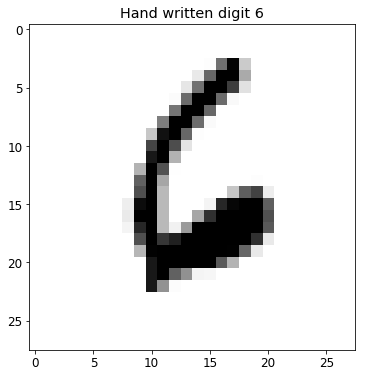

In [42]:
imshow(x_train[ind], cmap='gray_r')
_ = title('Hand written digit '+str(y_train[ind]))